<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Python/Classification/RandomForest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import sklearn.model_selection as skm
import matplotlib.pyplot as plt

In [3]:
np.random.seed(200804)

#EDA

In [5]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# colum renaming and dropna
titanic.rename(columns={ col: col.lower() for col in titanic.columns}, inplace = True )
titanic.dropna(inplace=True)

In [10]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [12]:
#masks for sex columns
titanic.sex.mask(titanic.sex == 'female', '1', inplace=True)
titanic.sex.mask(titanic.sex == 'male', '0', inplace=True)
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [13]:
#independent and dependent variables 
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic[['survived']]

#Data split

In [16]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, random_state=111, test_size=0.3)
print('training data shape: ', X_train.shape, y_train.shape)
print('testing data shape', X_test.shape, y_test.shape)

training data shape:  (128, 6) (128, 1)
testing data shape (55, 6) (55, 1)


#Training

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# oob_score indica si usar muestras sout-of-bag para estimar score de generalización
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
#n_estimators -> How many trees will generate the forest

grid = {'n_estimators': [600,800,1000], 'criterion': ['gini', 'entropy'], 'min_samples_leaf':[5,7,9,11]}

#Althougth RandomForest does not need cv, GreadSearchCV object needs 3 k-folds at least.
gs = skm.GridSearchCV(rf, param_grid=grid, scoring='precision', cv=3, n_jobs=-1, return_train_score=True)

In [39]:
#Training 24 models
gs.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                   

In [40]:
best_model = gs.best_estimator_

In [41]:
type(best_model)

sklearn.ensemble._forest.RandomForestClassifier

In [42]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
best_model.oob_score_
# Out of bag score associated with accuracy

0.7421875

In [44]:
gs.best_score_

0.7972027972027972

**Feature importance**

In [45]:
best_model.feature_importances_

array([0.02716991, 0.47485852, 0.24810238, 0.02179722, 0.03834892,
       0.18972305])

In [47]:
X.columns.values

array(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

**Predictions**

In [54]:
predicted_labels = best_model.predict(X_test)
predicted_labels[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [57]:
predicted_scores = best_model.predict_proba(X_test)
predicted_scores[:10,]

array([[0.12122233, 0.87877767],
       [0.15791945, 0.84208055],
       [0.57053506, 0.42946494],
       [0.14682706, 0.85317294],
       [0.07599695, 0.92400305],
       [0.4490293 , 0.5509707 ],
       [0.32745976, 0.67254024],
       [0.02326901, 0.97673099],
       [0.37748264, 0.62251736],
       [0.28435794, 0.71564206]])

**Metrics**

In [76]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_labels)
accuracy

0.6909090909090909

In [60]:
#ROC y AUC
from sklearn.metrics import roc_auc_score, roc_curve

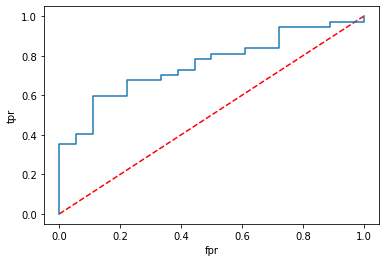

In [63]:
fpr, tpr, threshold = roc_curve(y_test, predicted_scores[:,1], pos_label=True)

plt.clf()
plt.plot([0,1], [0,1], 'k--', c='red')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_labels)

array([[ 8, 10],
       [ 7, 30]])

In [78]:
#precision, recall and f1score
from sklearn.metrics import recall_score, precision_score, f1_score

print('precision', precision_score(y_test, predicted_labels))
print('recall', recall_score(y_test, predicted_labels) )
print('f1_score', f1_score(y_test, predicted_labels) )




precision 0.75
recall 0.8108108108108109
f1_score 0.7792207792207791
